In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from scipy.cluster.hierarchy import dendrogram

In [8]:
df = pd.read_csv('../mydata/vgsales.csv')
df = df.dropna().reset_index(drop=True)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [32]:
from sklearn.cluster import KMeans
# 'room_type' and neighbourhood_group can easilty be used post dummy-coding

cluster_ready = df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']]

model = KMeans(n_clusters=4)
clusters = model.fit_predict(cluster_ready)

print(len(clusters))
cluster_ready['cluster'] = clusters
cluster_ready.cluster.value_counts()

16291


/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0    15310
3      900
2       71
1       10
Name: cluster, dtype: int64

/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


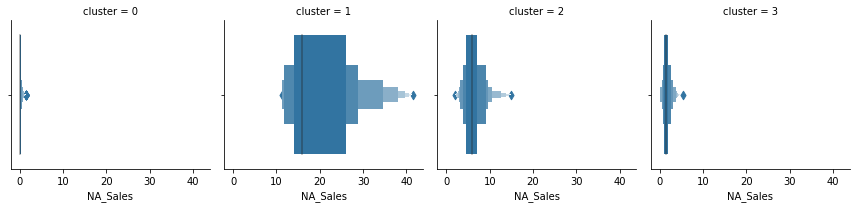

In [36]:
g = sns.FacetGrid(cluster_ready, col="cluster", margin_titles=True)
g.map(sns.boxenplot, "NA_Sales");

/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


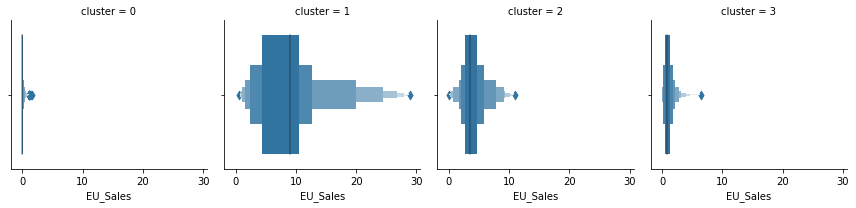

In [37]:
# ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']
g = sns.FacetGrid(cluster_ready, col="cluster", margin_titles=True)
g.map(sns.boxenplot, "EU_Sales");

/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


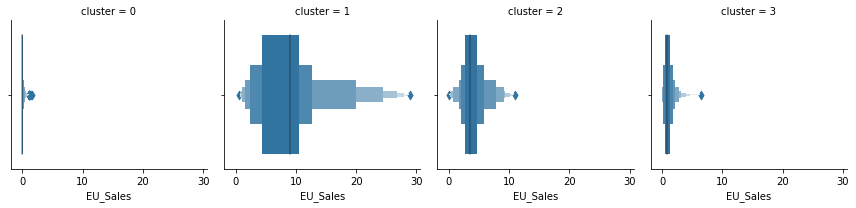

In [38]:
# ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']
g = sns.FacetGrid(cluster_ready, col="cluster", margin_titles=True)
g.map(sns.boxenplot, "EU_Sales");

/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


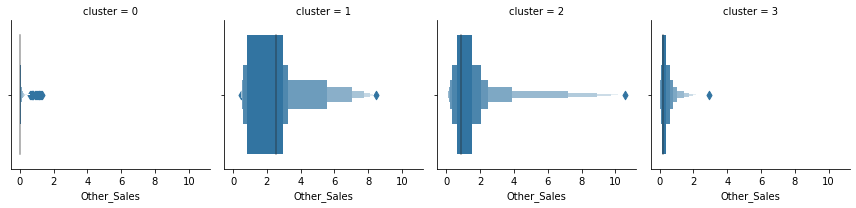

In [39]:
# ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']
g = sns.FacetGrid(cluster_ready, col="cluster", margin_titles=True)
g.map(sns.boxenplot, "Other_Sales");

/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


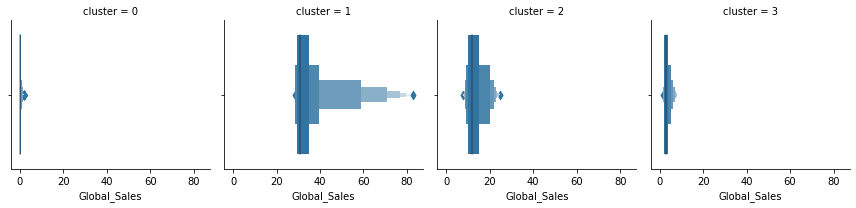

In [40]:
# ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']
g = sns.FacetGrid(cluster_ready, col="cluster", margin_titles=True)
g.map(sns.boxenplot, "Global_Sales");